<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> 🚀 ИТОГИ РЕВЬЮ 🚀 : </b>

Все замечания учтены. Эта работа демонстрирует твоё умение формировать запросы SQL для решения подобных задач.

Поздравляю с успешным завершением финального этапа 👏

---

![](https://media.giphy.com/media/9hLq3XV0tykOINfyXc/giphy.gif)

---

После окончания дедлайнов представлю в канале Пачки дополнительные материалы для дальнейшего развития в этой области.

Успехов тебе в дальнейших начинаниях!

</div>

---

# SQL проект

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Наша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Наша первая задача как аналитика — проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

## Цели и задачи

* Посчитайте, сколько книг вышло после 1 января 2000 года;
* Для каждой книги посчитайте количество обзоров и среднюю оценку;
* Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
* Определите автора с самой высокой средней оценкой книг — учитывайте
только книги с 50 и более оценками;
* Посчитайте среднее количество обзоров от пользователей, которые поставили
больше 48 оценок. 

## Описание данных

Таблица **books** содержит данные о книгах:
* book_id — идентификатор книги;
* author_id — идентификатор автора;
* title — название книги;
* num_pages — количество страниц;
* publication_date — дата публикации книги;
* publisher_id — идентификатор издателя.

Таблица **authors** содержит данные об авторах:
* author_id — идентификатор автора;
* author — имя автора.

Таблица **publishers** содержит данные об издательствах:
* publisher_id — идентификатор издательства;
* publisher — название издательства.

Таблица **ratings** содержит данные о пользовательских оценках книг:
* rating_id — идентификатор оценки;
* book_id — идентификатор книги;
* username — имя пользователя, оставившего оценку;
* rating — оценка книги.

Таблица **reviews** содержит данные о пользовательских обзорах на книги:
* review_id — идентификатор обзора;
* book_id — идентификатор книги;
* username — имя пользователя, написавшего обзор;
* text — текст обзора.

## Доступ к базе данных

In [1]:
# импортируем библиотеки
import pandas as pd
import sqlalchemy as sa

In [2]:
# устанавливаем параметры
db_config = {
'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db' # название базы данных
}
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)
# сохраняем коннектор
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ✏️ Рекомендация тимлида: </b>

Разные этапы выполнения кода смешаны и не разделены логически.

Советую структурировать код в разных ячейках следующим образом:

* сначала разместить импорты библиотек.
* затем блок кода, отвечающий за открытие и обработку данных.
* и, наконец, сам рабочий код.

Такой подход повысит читаемость кода, упростит поиск и исправление ошибок, а также предотвратит ненужное повторное выполнение кода.

</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> Комментарий студента : </b>

Исправлено👌

</div>

In [3]:
# чтобы выполнить SQL-запрос, пишем функцию с использованием Pandas
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con = con)

## Исследование таблиц — выведите первые строки, посчитайте количество строк в каждой таблице

### books

In [4]:
books = '''SELECT * 
           FROM books'''
          
get_sql_data(books).head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [5]:
print('В таблице books',len(get_sql_data(books)),'строк')

В таблице books 1000 строк


### authors

In [6]:
authors = '''SELECT * 
           FROM authors'''
          
get_sql_data(authors).head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [7]:
print('В таблице authors',len(get_sql_data(authors)),'строк')

В таблице authors 636 строк


### publishers 

In [8]:
publishers = '''SELECT * 
           FROM publishers'''
          
get_sql_data(publishers).head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [9]:
print('В таблице publishers',len(get_sql_data(publishers)),'строк')

В таблице publishers 340 строк


### ratings

In [10]:
ratings = '''SELECT * 
           FROM ratings'''
          
get_sql_data(ratings).head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [11]:
print('В таблице ratings',len(get_sql_data(ratings)),'строк')

В таблице ratings 6456 строк


### reviews

In [12]:
reviews = '''SELECT * 
           FROM reviews'''
          
get_sql_data(reviews).head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [13]:
print('В таблице reviews',len(get_sql_data(reviews)),'строк')

В таблице reviews 2793 строк


### Вывод

* В таблице books 1000 строк;
* В таблице authors 636 строк;
* В таблице publishers 340 строк;
* В таблице ratings 6456 строк;
* В таблице reviews 2793 строк.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ✔️ Комментарий тимлида : </b>

Данные успешно загружены и проанализированы, а также предоставлена информация об их структуре.

Теперь всё готово для дальнейшего выполнения заданий.

</div>

## Задания

### Посчитайте, сколько книг вышло после 1 января 2000 года

In [14]:
query_1 = '''SELECT count(*)
             FROM books
             WHERE publication_date > '2000-01-01' '''

get_sql_data(query_1).head()

,count
0,819


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ✔️ Комментарий тимлида : </b>

Подход корректный и ответ верный

</div>

После 1 января 2000 года вышло 819 книг.

### Для каждой книги посчитайте количество обзоров и среднюю оценку

In [15]:
query_2 = '''WITH
             reviews_count AS (SELECT book_id,
                                      COUNT(review_id) AS reviews_count
                               FROM reviews
                               GROUP BY book_id),
             rating_mean AS (SELECT book_id,
                                    ROUND(AVG(rating), 1) AS rating_mean 
                             FROM ratings
                             GROUP BY book_id)
             
             SELECT b.title,
                    rev.reviews_count,
                    rat.rating_mean
             FROM books AS b
             LEFT JOIN reviews_count AS rev on b.book_id = rev.book_id
             LEFT JOIN rating_mean AS rat on b.book_id = rat.book_id'''                   
                                                              
get_sql_data(query_2)

,title,reviews_count,rating_mean
0,The Body in the Library (Miss Marple #3),2.0,4.5
1,Galápagos,2.0,4.5
2,A Tree Grows in Brooklyn,5.0,4.3
3,Undaunted Courage: The Pioneering First Missio...,2.0,4.0
4,The Prophet,4.0,4.3
...,...,...,...
995,Alice in Wonderland,4.0,4.2
996,A Woman of Substance (Emma Harte Saga #1),2.0,5.0
997,Christine,3.0,3.4
998,The Magicians' Guild (Black Magician Trilogy #1),2.0,3.5


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ✔️ Комментарий тимлида : </b>

Этот запрос считается одним из самых сложных в этом проекте, но результат получен правильно

</div>

### Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [16]:
query_3 = '''SELECT p.publisher AS publisher,
                    count(b.book_id) AS books_qty
             FROM books AS b
             JOIN publishers AS p on b.publisher_id=p.publisher_id
             WHERE b.num_pages > 50
             GROUP BY publisher
             ORDER BY books_qty DESC
             LIMIT 1'''
             
get_sql_data(query_3)

,publisher,books_qty
0,Penguin Books,42


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ✔️ Комментарий тимлида : </b>

Согласен с результатом. Действительно, выбранное издательство является лидером по числу выпущенных книг.

</div>

Издательство, которое выпустило наибольшее число книг толще 50 страниц - Penguin Books.

### Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [17]:
query_4 = '''WITH 
             author_rating_mean AS (SELECT b.author_id,
                                           AVG(rating) AS rating_mean
                                    FROM books AS b
                                    JOIN ratings AS rat on b.book_id=rat.book_id
                                    WHERE b.book_id IN (SELECT rat.book_id
                                                        FROM ratings AS rat
                                                        GROUP BY rat.book_id
                                                        HAVING COUNT(rat.rating_id) >= 50)
                                    GROUP BY b.author_id)

             SELECT a.author AS author,
                    arm.rating_mean AS rating_mean
                    FROM authors AS a
             JOIN author_rating_mean AS arm ON a.author_id = arm.author_id
             ORDER BY rating_mean DESC 
             LIMIT 1''' 
       
get_sql_data(query_4)

,author,rating_mean
0,J.K. Rowling/Mary GrandPré,4.287097


<div id="div_id1" class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ⁉️ Критическое замечание тимлида : </b>

<s>[⬆ Ошибка №1](#1)

Фильтрация книг проведена верно и автор правильно указан.

Однако я бы порекомендовал не округлять результаты до такой степени, так как это может привести к искажению данных.

Твой вариант:

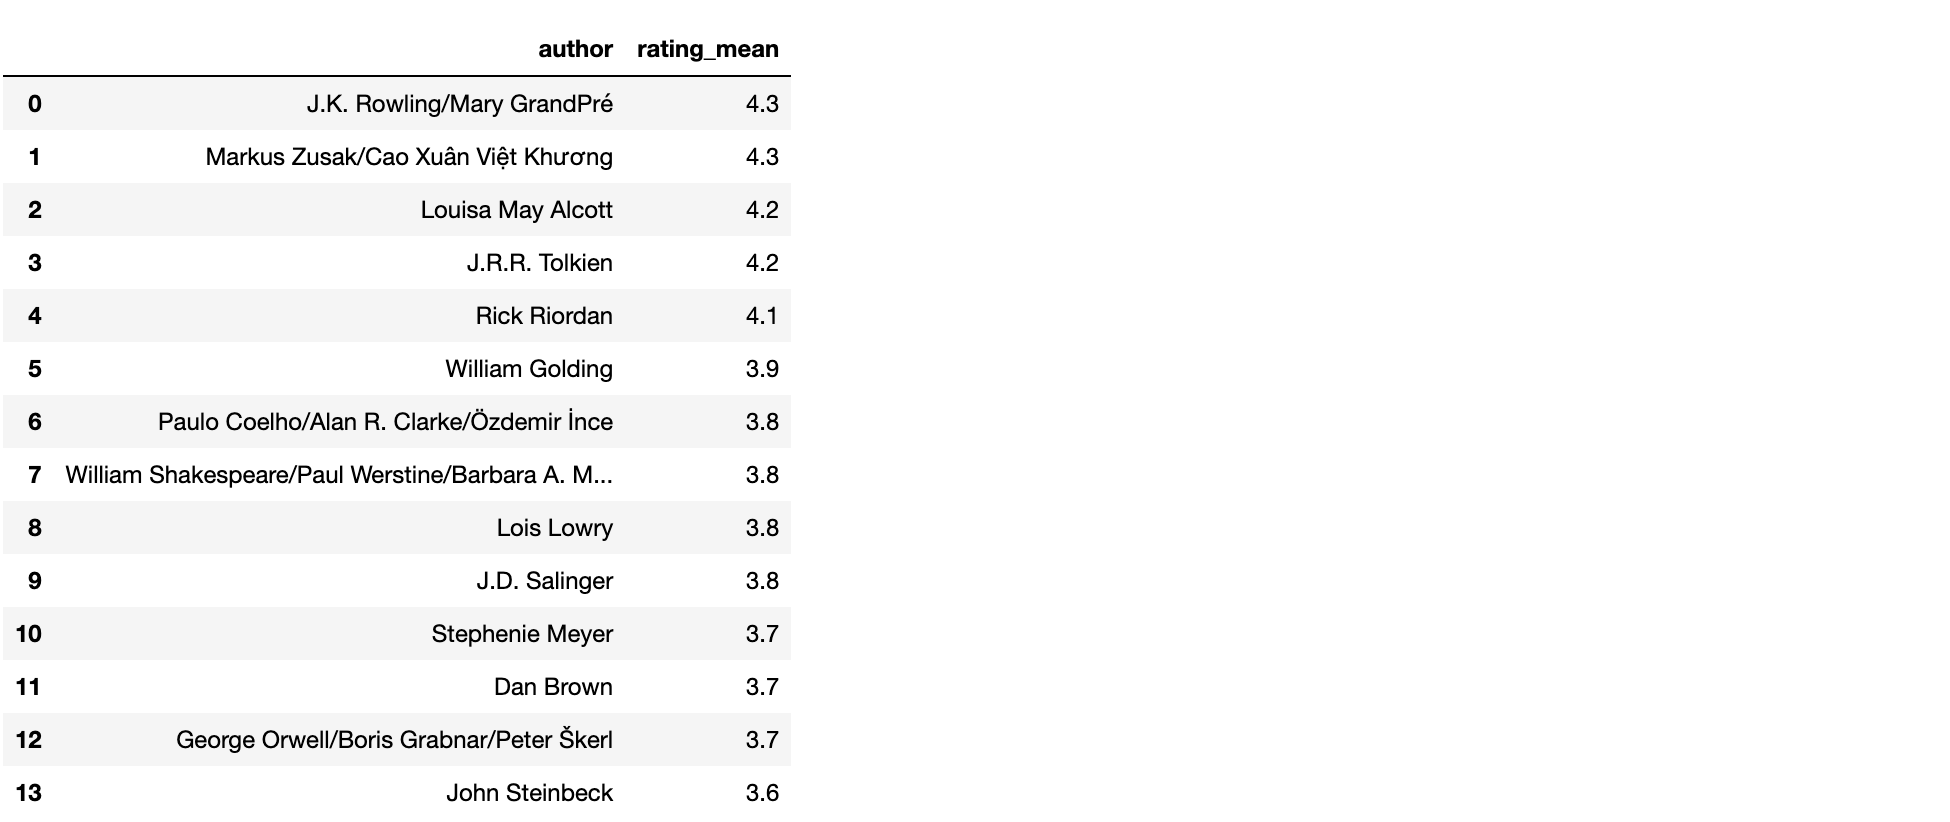

Вариант без округления:

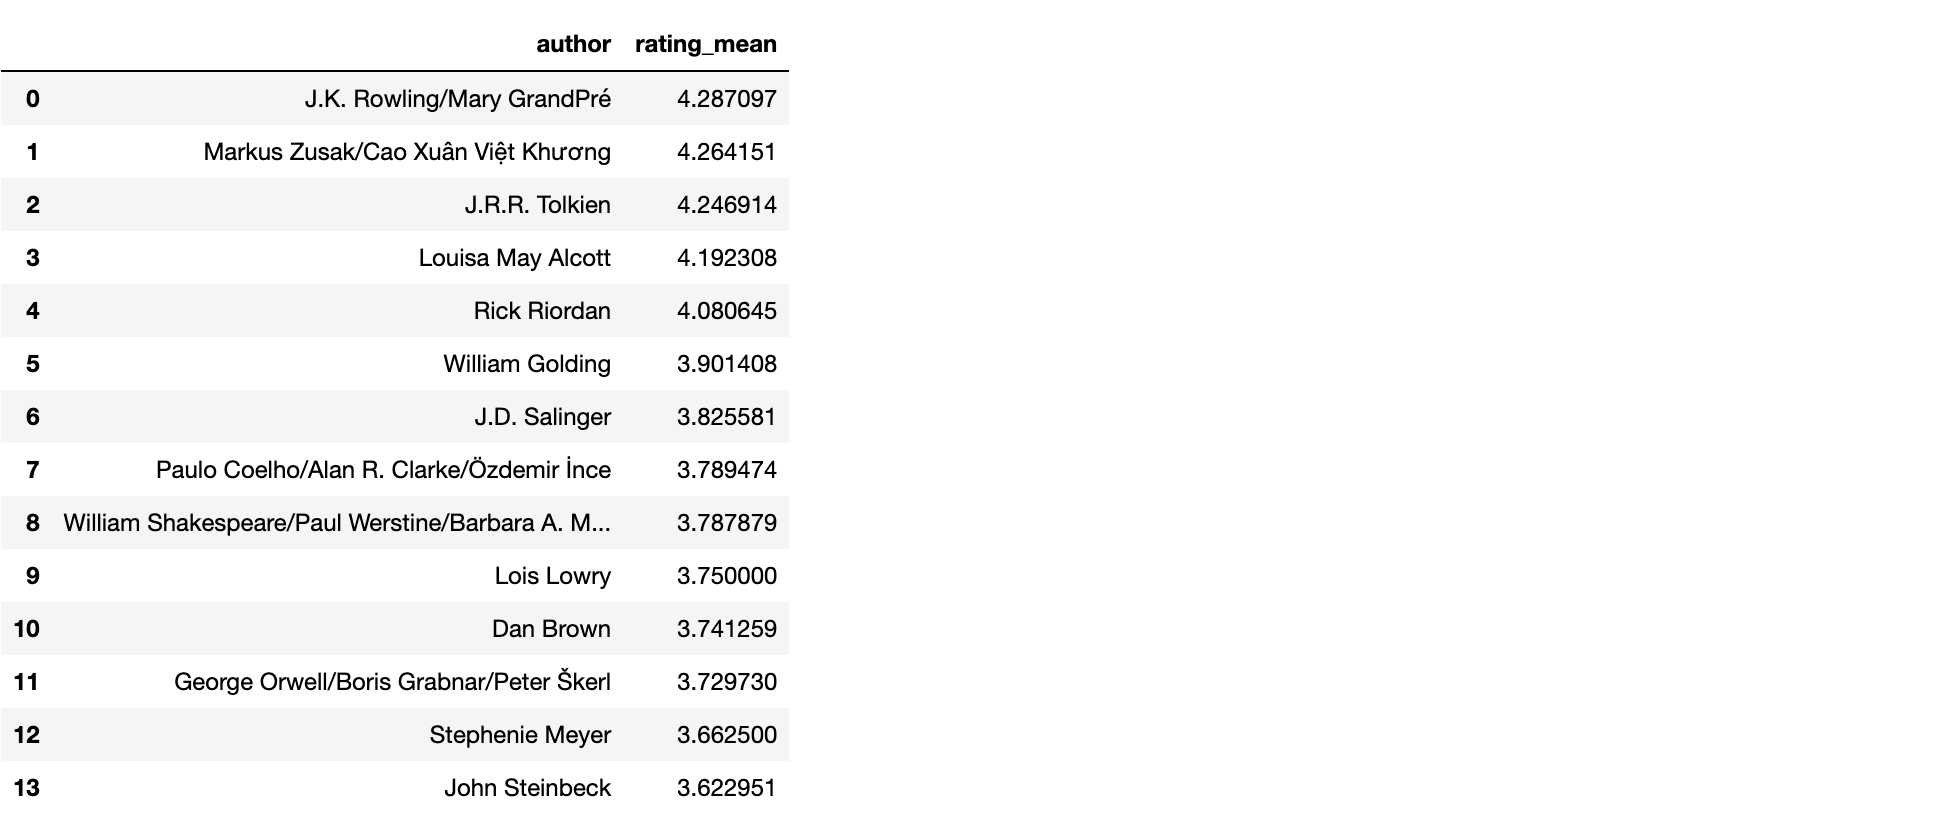

Как видишь некоторые авторы поменяли свои позиции

</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> Комментарий студента : </b>

Исправлено👌

</div>

Автор с самой высокой средней оценкой книг (среди книг 50 оценками и более) - J.K. Rowling/Mary GrandPré

### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [18]:
query_5 = '''WITH 
             reviews_count AS (SELECT username,
                                      COUNT(review_id)
                               FROM reviews
                               WHERE username IN (SELECT username
                                                  FROM ratings 
                                                  GROUP BY username
                                                  HAVING COUNT(rating_id) > 48)
                               GROUP BY username)
             
             SELECT AVG(count) AS review_count_mean
             FROM reviews_count'''
             
get_sql_data(query_5)           

,review_count_mean
0,24.0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ✔️ Комментарий тимлида : </b>

Это верный ответ. Пользователи корректно отобраны, а их показатели правильно рассчитаны.


</div>

Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок - 24

### Вывод

* После 1 января 2000 года вышло 819 книг;
* Издательство, которое выпустило наибольшее число книг толще 50 страниц - Penguin Books;
* Автор с самой высокой средней оценкой книг (среди книг 50 оценками и более) - J.K. Rowling/Mary GrandPré;
* Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок - 24.